In [2]:
from sysdata.sim.csv_futures_sim_data import csvFuturesSimData
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from paper.topic.mdi import rolling_snr
from paper.systems.crypto_system import perpetuals_system
from itables import show

system = perpetuals_system()
rawdata = system.rawdata
data = system.data


Bad key text.latex.preview in file /opt/homebrew/Caskroom/miniconda/base/envs/trading/lib/python3.8/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle, line 123 ('text.latex.preview : False')
You probably need to get an updated matplotlibrc file from
https://github.com/matplotlib/matplotlib/blob/v3.5.0/matplotlibrc.template
or from the matplotlib source distribution

Bad key mathtext.fallback_to_cm in file /opt/homebrew/Caskroom/miniconda/base/envs/trading/lib/python3.8/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle, line 155 ('mathtext.fallback_to_cm : True  # When True, use symbols from the Computer Modern')
You probably need to get an updated matplotlibrc file from
https://github.com/matplotlib/matplotlib/blob/v3.5.0/matplotlibrc.template
or from the matplotlib source distribution

Bad key savefig.jpeg_quality in file /opt/homebrew/Caskroom/miniconda/base/envs/trading/lib/python3.8/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle, 

/Users/weiranzhou/Code/pysystemtrade/sysobjects/futures_per_contract_prices.py:35: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  self._as_df = price_data_as_df


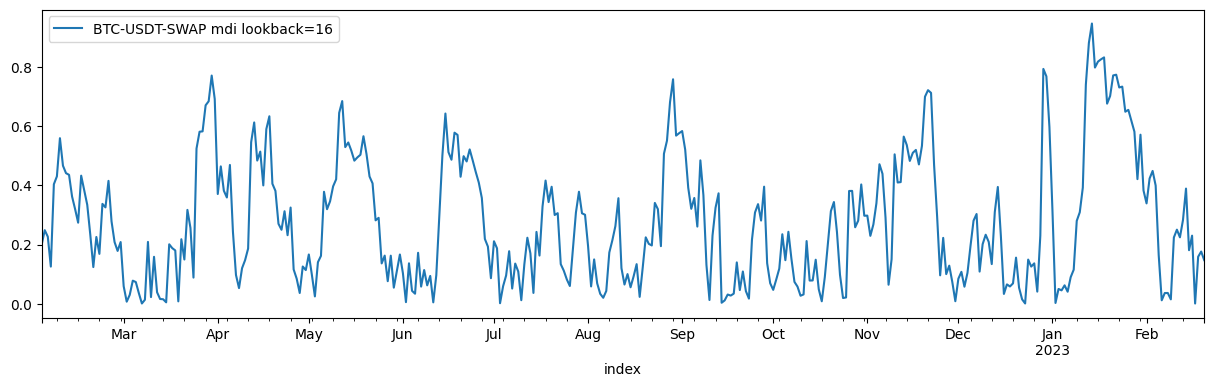

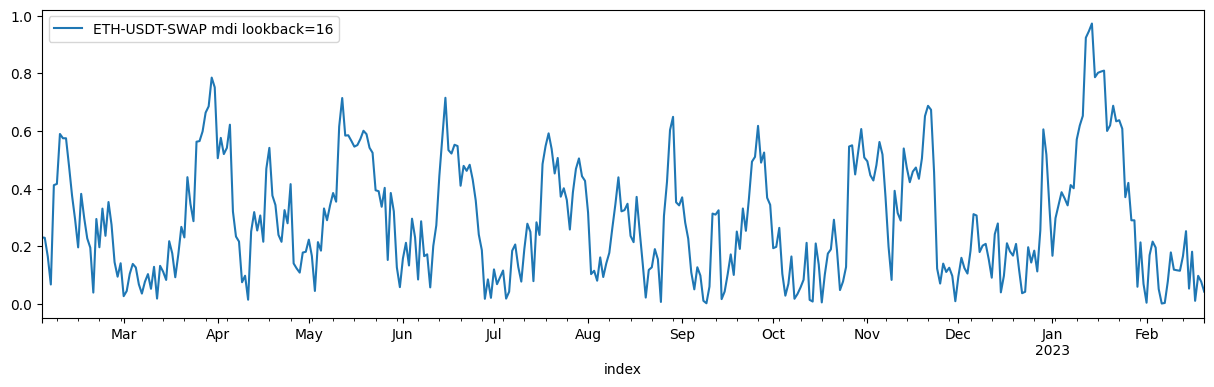

In [6]:
def select(se):
    return se[(se.index > '2022-02-01') &(se.index < '2024-01-20')]

def cal_mdi(Fre = 'Day'):
    lookback_2_mdi = {}
    year_2_lookback_2_mdi = {}

    # term_range = [8, 12, 16, 20, 24, 28, 32, 36, 40]
    term_range = [16]
    for term in term_range:
        inss = [ins for ins in system.get_instrument_list()]
        if Fre == 'Day':
            snrs = [rolling_snr(data.daily_prices(ins).dropna(), term).rename(ins) for ins in inss]
        elif Fre == 'Hour':
            snrs = [rolling_snr(data.hourly_prices(ins).dropna(), term).rename(ins) for ins in inss]

        ins_mdi_df = pd.concat(snrs, axis=1)

        year_2_mdi = {}
        history = ins_mdi_df.mean(axis=0).rename('mdi-history').sort_values(ascending=False)
        for year in [2020, 2021, 2022, 2023]:
            _mdi = ins_mdi_df[(ins_mdi_df.index>='{}-01-01'.format(year)) & (ins_mdi_df.index<'{}-01-01'.format(year+1))].mean(axis=0).rename('mdi-{}'.format(year)).sort_values(ascending=False)
            year_2_mdi[year] = _mdi 
        year_2_lookback_2_mdi[term] = year_2_mdi
        lookback_2_mdi[term] = ins_mdi_df

    for ins in inss:
        se = lookback_2_mdi[term][ins].rename('{} mdi lookback={}'.format(ins, term))
        se = select(se)
        se.plot(figsize=(15, 4), legend=True)
        plt.show()
    
    return lookback_2_mdi
# hour_lookback_2_mdi = cal_mdi('Hour')
day_lookback_2_mdi = cal_mdi('Day')

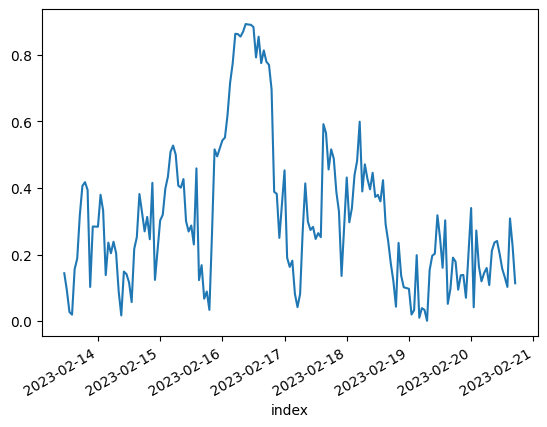

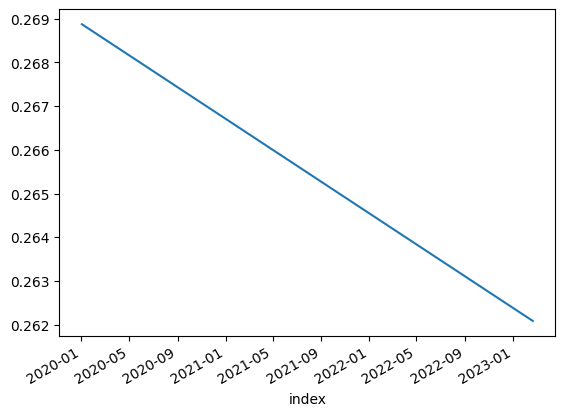

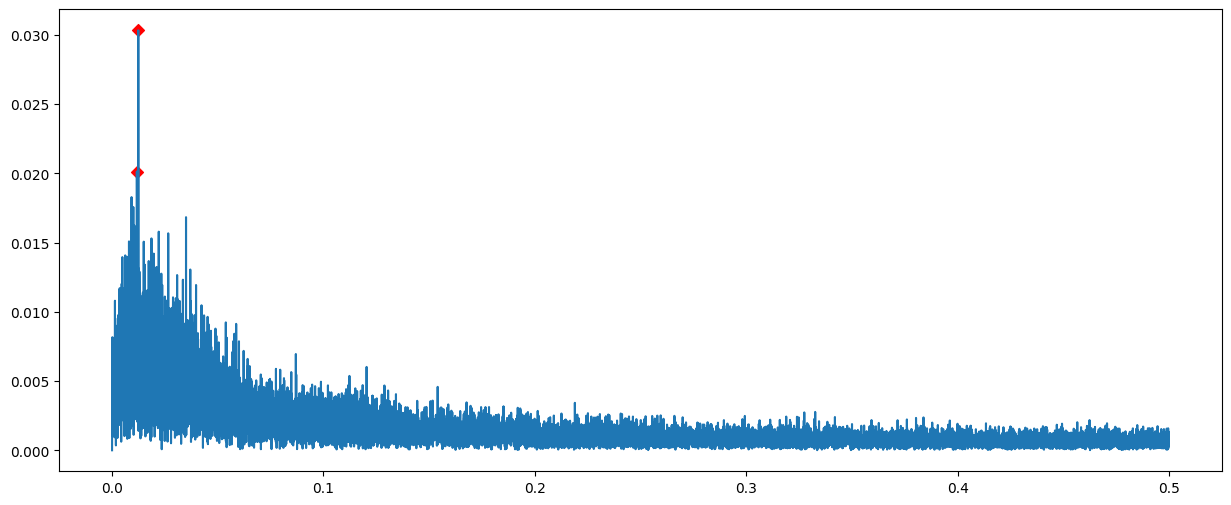

F=0.011726310196956474, T=85.27831715210355, Amplitude=0.020134019637723728
F=0.012409396227847142, T=80.58409785932722, Amplitude=0.030333550394414172


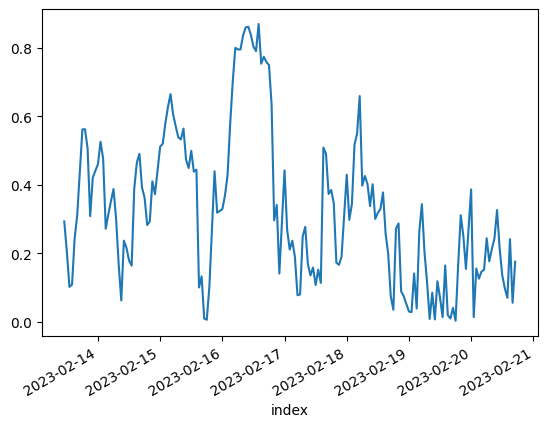

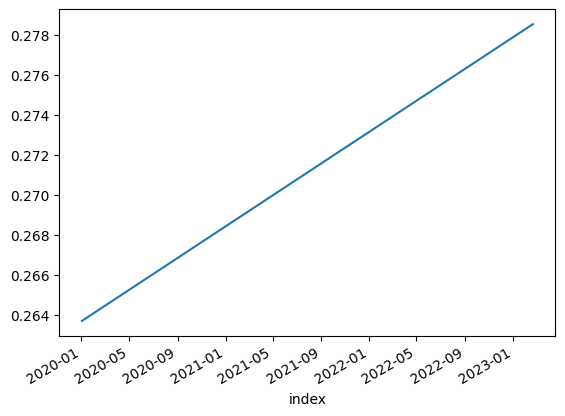

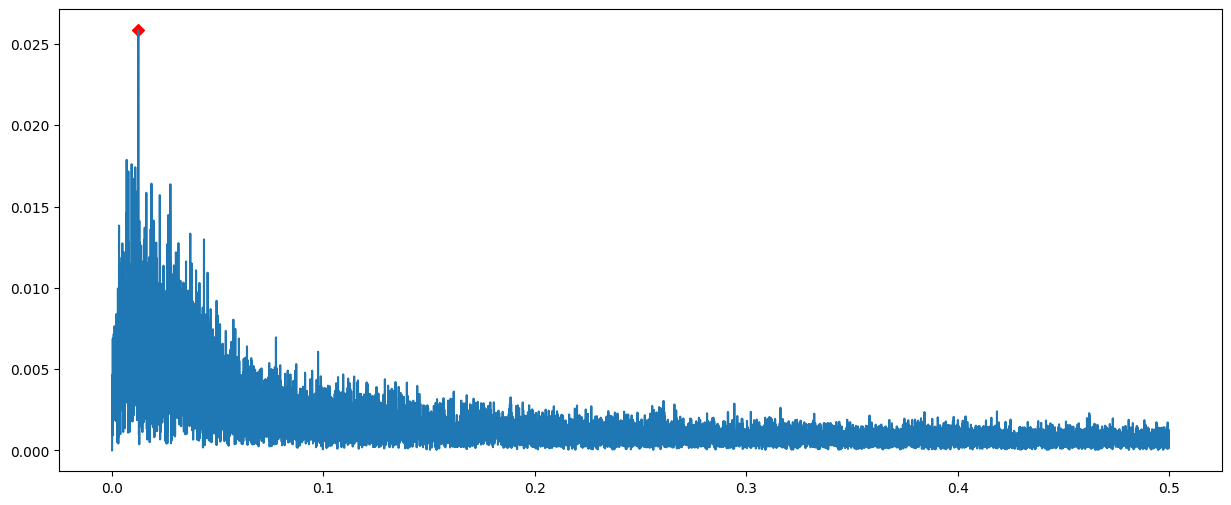

F=0.012409396227847142, T=80.58409785932722, Amplitude=0.025845873638638574


In [9]:
from paper.topic.trend.spectrum import signal_fft

for ins in  system.get_instrument_list():
    sampled_signal = lookback_2_mdi[16][ins].dropna()
    sampled_signal.tail(7 * 24).plot()
    plt.show()
    ins = sampled_signal.name
    signal_fft(sampled_signal, 1, 0.02)